In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
sns.set_style("whitegrid")
df = pd.read_csv('drug_consumption.csv')
#df.head()

In [3]:
def hasTrippedMushrooms(x):
    if x == "CL0":
        return 0
    else:
        return 1 


<BarContainer object of 2 artists>

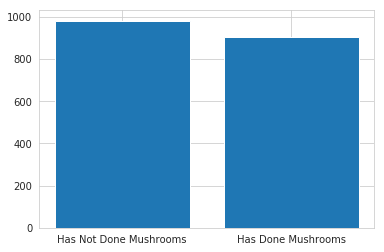

In [4]:
df["Tripped Shrooms?"] = df["Mushrooms"].apply(hasTrippedMushrooms)
df["Tripped Shrooms?"].value_counts()
xvals = ["Has Not Done Mushrooms", "Has Done Mushrooms"]
plt.bar(xvals, df["Tripped Shrooms?"].value_counts())
#plt.set_title("Have ")
#df.head()
#

0    1069
1     816
Name: Tripped LSD?, dtype: int64

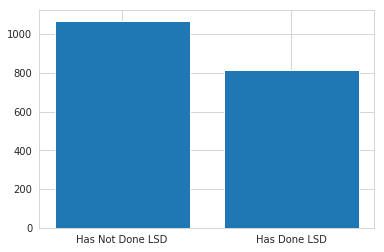

In [5]:
def hasTrippedLSD(x):
    if x == "CL0":
        return 0
    else:
        return 1 

df["Tripped LSD?"] = df["LSD"].apply(hasTrippedLSD)
df["Tripped LSD?"].value_counts()
xvals = ["Has Not Done LSD", "Has Done LSD"]

plt.bar(xvals, df["Tripped LSD?"].value_counts())
df["Tripped LSD?"].value_counts()
#plt.set_title("Have ")
#df.head()
#

# Insight 
More people have done mushrooms than LSD before 

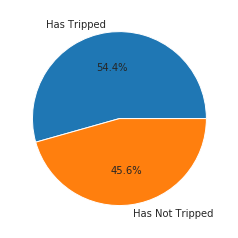

In [6]:
def hasTripped(x):
    if x == "CL0":
        return 0
    else:
        return 1 
def isolate(x): 
    if x == 1 or x ==2: 
        return 1 
    else: 
        return 0 
    
df["Tripped?"] = df["Tripped Shrooms?"] + df["Tripped LSD?"] 
df["Tripped?"] = df["Tripped?"].apply(isolate)

df["Tripped?"].value_counts()
xvals = ["Has Tripped", "Has Not Tripped"]

plt.pie(df["Tripped?"].value_counts(), labels = xvals, autopct='%1.1f%%');

#df["Tripped?"].value_counts()
#plt.set_title("Have ")
#df.head()
#

0    860
2    694
1    331
Name: Tripped on how many?, dtype: int64

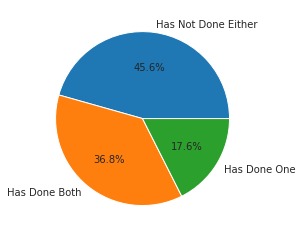

In [7]:
def hasTripped(x):
    if x == "CL0":
        return 0
    else:
        return 1 

df["Tripped on how many?"] = df["Tripped Shrooms?"] + df["Tripped LSD?"] 
df["Tripped on how many?"].value_counts()
xvals = ["Has Not Done Either", "Has Done Both", "Has Done One"]

plt.pie(df["Tripped on how many?"].value_counts(), labels = xvals,autopct='%1.1f%%')
df["Tripped on how many?"].value_counts()
#plt.set_title("Have ")
#df.head()
#

In [8]:
print("Openness Score of People Who Have Tripped At Least Once")
df[df["Tripped?"] == 1]['Oscore'].mean()

Openness Score of People Who Have Tripped At Least Once


0.32966835121951293

In [9]:
print("Openness Score of People Who Have Never Tripped")
df[df["Tripped?"] == 0]['Oscore'].mean()

Openness Score of People Who Have Never Tripped


-0.3940899999999987

In [10]:
print("Mean Openness Score")
df['Oscore'].mean()

Mean Openness Score


-0.0005343978779841072

In [11]:
df[df["Tripped?"] == 1][:].mean() - df[:].mean()

ID                      67.960650
Age                     -0.131762
Gender                  -0.116947
Education               -0.127260
Country                 -0.294313
Ethnicity                0.018305
Nscore                   0.064918
Escore                  -0.025451
Oscore                   0.330203
Ascore                  -0.127552
Cscore                  -0.194383
Impulsive                0.248598
SS                       0.336065
Tripped Shrooms?         0.401931
Tripped LSD?             0.363206
Tripped?                 0.456233
Tripped on how many?     0.765137
dtype: float64

# Affect of Tripping 
It seems that the average openness of a psychedelic user is much higher than any other category 

In [12]:
np.std(df[df["Tripped?"] == 1]['Oscore'])

0.940645544042255

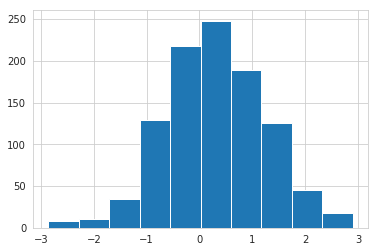

In [13]:
fig, ax = plt.subplots()
ax = plt.hist(df[df["Tripped?"] == 1]['Oscore'])

(array([  5.,  16.,  56., 129., 231., 210., 136.,  47.,  20.,  10.]),
 array([-3.27393 , -2.701633, -2.129336, -1.557039, -0.984742, -0.412445,
         0.159852,  0.732149,  1.304446,  1.876743,  2.44904 ]),
 <a list of 10 Patch objects>)

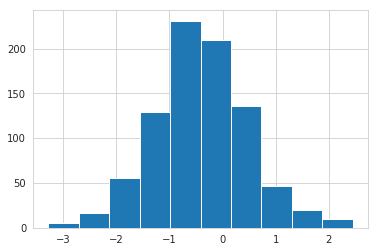

In [14]:
plt.hist(df[df["Tripped?"] == 0]['Oscore'])

# Psychedelic Openness Hypothesis Testing 


Null Hypothesis H0: that the mean openness for non-psychedelic users = the mean openness for psychedelic users 
Ha: Psych users are more open 

In [15]:
var0 = (np.var(df[df["Tripped?"] == 0]['Oscore']))/len(df[df["Tripped?"] == 0]['Oscore'])
var1 = (np.var(df[df["Tripped?"] == 1]['Oscore']))/len(df[df["Tripped?"] == 1]['Oscore'])

shared_sample_variance = var0 + var1
#print(shared_sample_variance)
diff_in_Oscore = stats.norm(0, np.sqrt(shared_sample_variance))




In [16]:
# fig, ax = plt.subplots(1, figsize=(16, 3))

# x = np.linspace(-0.25, 0.75, num=250)
# ax.plot(x, diff_in_Oscore.pdf(x), linewidth=3)
# ax.set_xlim(-0.25, 0.75)
# ax.axvline(mean_diff)

# ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$");

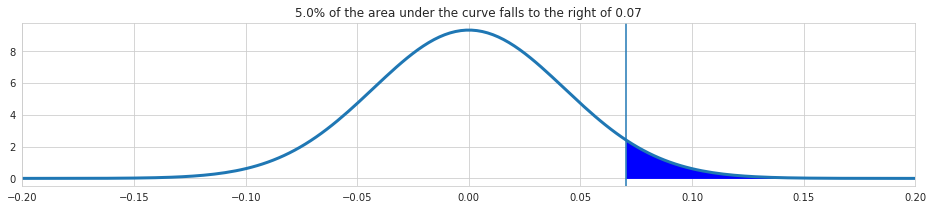

In [17]:
𝛼 = 0.05
x = np.linspace(-3, 3, num=2500)
threshold = diff_in_Oscore.ppf(1-𝛼)

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.plot(x, diff_in_Oscore.pdf(x), linewidth=3)
ax.axvline(threshold)
ax.set_xlim(-0.2, 0.20)
ax.fill_between(x, 0, diff_in_Oscore.pdf(x), x>threshold, color = 'blue')
ax.set_title(f'{100*𝛼}% of the area under the curve falls to the right of {round(threshold,3)}');

In [18]:
mean_diff = df[df["Tripped?"] == 1]['Oscore'].mean() - df[df["Tripped?"] == 0]['Oscore'].mean()
mean_diff

0.7237583512195116

In [19]:
p_value = 1 - diff_in_Oscore.cdf(mean_diff)
p_value 
#print("p-value for openness comparison: {:2.3f}".format(p_value))

0.0

In [20]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Oscore'], df[df["Tripped?"] == 0]['Oscore'])
tdiff_in_Oscore[1]

1.9383924863049046e-59

In [21]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Impulsive'], df[df["Tripped?"] == 0]['Impulsive'])
tdiff_in_Oscore[1]

2.056089514730359e-36

In [22]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['SS'], df[df["Tripped?"] == 0]['SS'])
tdiff_in_Oscore[1]

4.175824191309417e-66

In [23]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Ascore'], df[df["Tripped?"] == 0]['Ascore'])
tdiff_in_Oscore[1]

1.1376640083766759e-09

In [24]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Cscore'], df[df["Tripped?"] == 0]['Cscore'])
tdiff_in_Oscore[1]

9.643005652650709e-21

In [25]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Nscore'], df[df["Tripped?"] == 0]['Nscore'])
tdiff_in_Oscore[1]

0.0020318443361281636

In [26]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Escore'], df[df["Tripped?"] == 0]['Escore'])
tdiff_in_Oscore[1]

0.22658702433064598

In [29]:
df[df["Tripped?"] == 1][:].mean() - df[:].mean()
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Tripped Shrooms?,Tripped LSD?,Tripped?,Tripped on how many?
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL2,CL0,CL0,0,0,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL2,CL3,CL0,CL4,CL0,CL0,0,1,1,1
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL1,CL0,CL0,CL0,1,0,1,1
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL0,CL2,CL0,CL0,0,0,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL0,CL0,CL2,CL2,CL0,CL0,1,0,1,1


# This compares people who have tripped at least once with if they have consumed alcohol in the past day 

In [55]:
def hasDoneAlcInPastDay(x):
    if x == "CL0" or x == "CL1" or x == "CL2" or x == "CL3" or x == "CL4" or x == "CL5":
        return 0
    else:
        return 1 
df["AlcToday?"] = df["Alcohol"].apply(hasDoneAlcInPastDay)
df["AlcToday?"].value_counts()
#xvals = ["Has Not Done Meth in the Past Week", "Has Done Meth in the Past Week"]
#plt.bar(xvals, df["MethInThePastWeek?"].value_counts())
#plt.set_title("Have ")
#df.head()
#df[df[df["CokeInThePastWeek?"]==1]["Tripped?"] ==1]
counts = df[df["Tripped?"]==1][df[df["Tripped?"]==1]["Cscore"] > 0]["AlcToday?"].value_counts()
print(counts[1] / (counts[0]+counts[1]))

print(counts)

0.2802056555269923
0    280
1    109
Name: AlcToday?, dtype: int64


In [57]:
counts = df[df["Tripped?"]==0][df[df["Tripped?"]==0]["Cscore"] > 0]["AlcToday?"].value_counts()
print(counts[1] / (counts[0]+counts[1]))

print(counts)

0.2628458498023715
0    373
1    133
Name: AlcToday?, dtype: int64


In [34]:
counts = df["AlcToday?"].value_counts()
counts[1] / (counts[0]+counts[1])

0.26790450928381965

In [37]:
df["Tripped?"].value_counts()

1    1025
0     860
Name: Tripped?, dtype: int64

In [54]:
df[df["Tripped?"]==1][df[df["Tripped?"]==1]["Cscore"] > 0]["AlcToday?"].value_counts()
# df[df["Tripped?"]==1]

0    280
1    109
Name: AlcToday?, dtype: int64

Text(0.5, 1.0, 'Openness Scores vs Psychedelic Use')

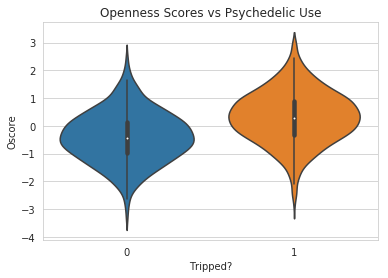

In [64]:
ax = sns.violinplot(x= "Tripped?", y = "Oscore", data = df)
ax.set_title("Openness Scores vs Psychedelic Use")